In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('Tiempos_promedio.csv')

variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)']
variable_dependiente = 'Tiempo promedio'

In [3]:
X = data[variables_independientes]
y = data[variable_dependiente]

In [4]:
X.head()

,GGrr (s),yyrr (s),rrGG (s),rryy (s)
0,37.576483,3.913838,24.983426,4.749123
1,45.436643,2.396441,37.971876,3.148316
2,12.395975,2.062528,22.925824,2.243075
3,16.940077,4.500471,50.386080,2.850595
4,20.298161,2.022959,12.604926,3.258112


In [7]:
y.head()

0    39.188075
1    39.162335
2    38.041704
3    43.084264
4    42.735499
Name: Tiempo promedio, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
modelo = LinearRegression()

In [31]:
modelo.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = modelo.predict(X_test)

In [42]:
modelo.coef_

array([ 0.12037987,  0.74153044, -0.04583924,  0.54503074])

In [43]:
modelo.intercept_

np.float64(34.793133813640516)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinaciín (R^2):  {r2: .2f}')
print(f'Intercepto: {modelo.intercept_:.2f}')

Error Cuadrático Medio (MSE): 19.48
Coeficiente de Determinaciín (R^2):   0.12
Intercepto: 34.79


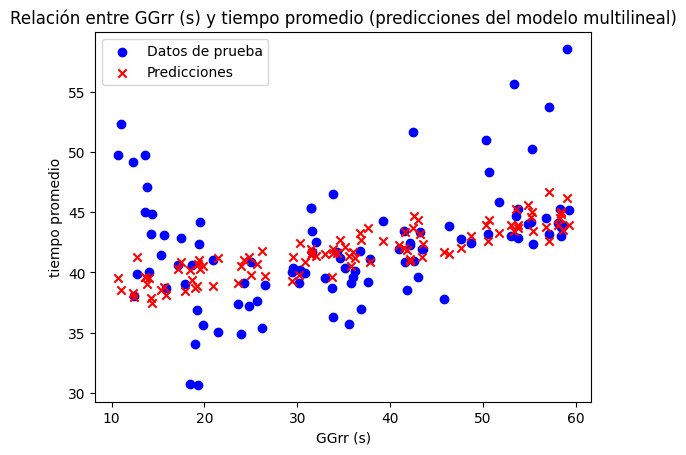

In [35]:
plt.scatter(X_test['GGrr (s)'], y_test, color='blue', label='Datos de prueba')
plt.scatter(X_test['GGrr (s)'], y_pred, color='red', marker='x', label='Predicciones')
plt.xlabel('GGrr (s)')
plt.ylabel('tiempo promedio')
plt.title('Relación entre GGrr (s) y tiempo promedio (predicciones del modelo multilineal)')
plt.legend()
plt.show()

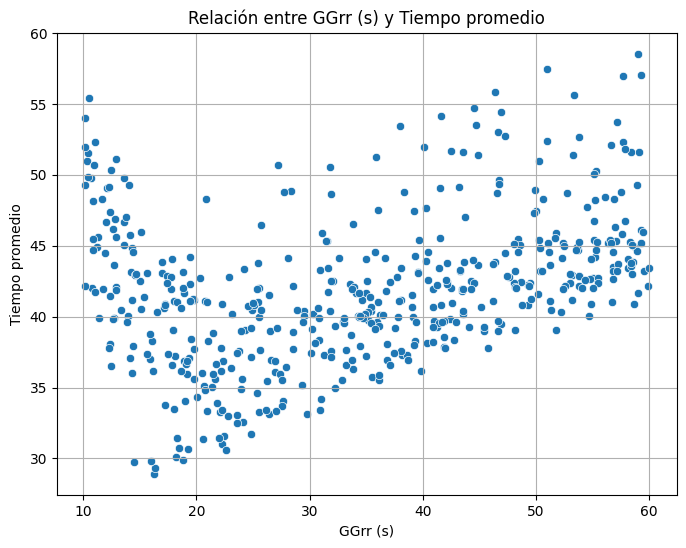

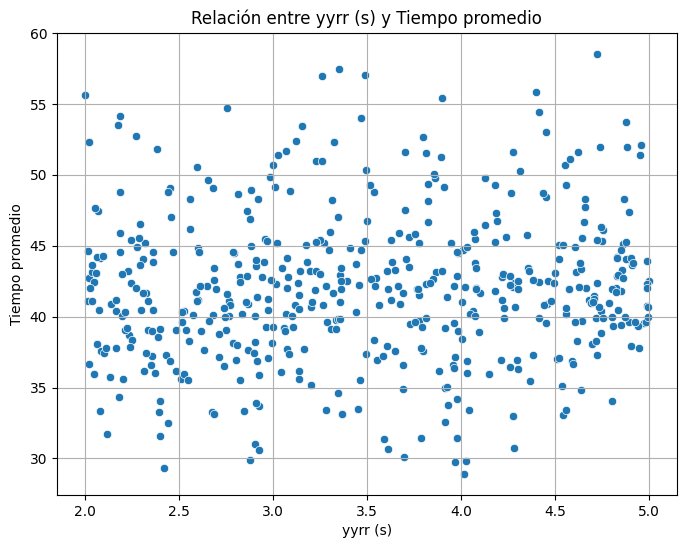

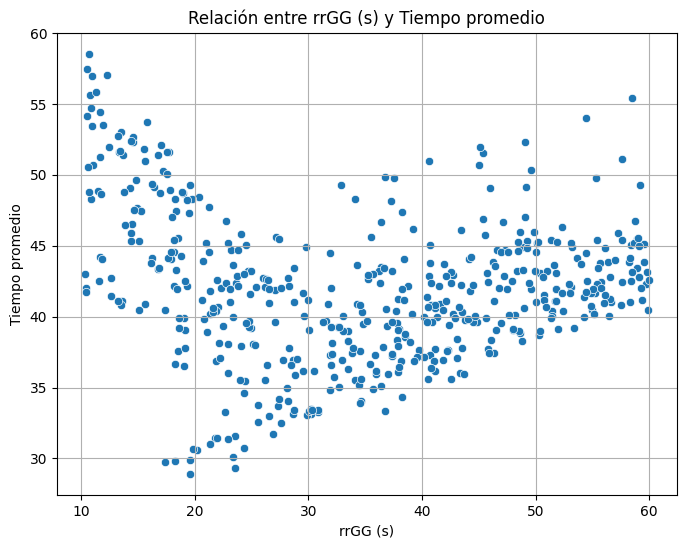

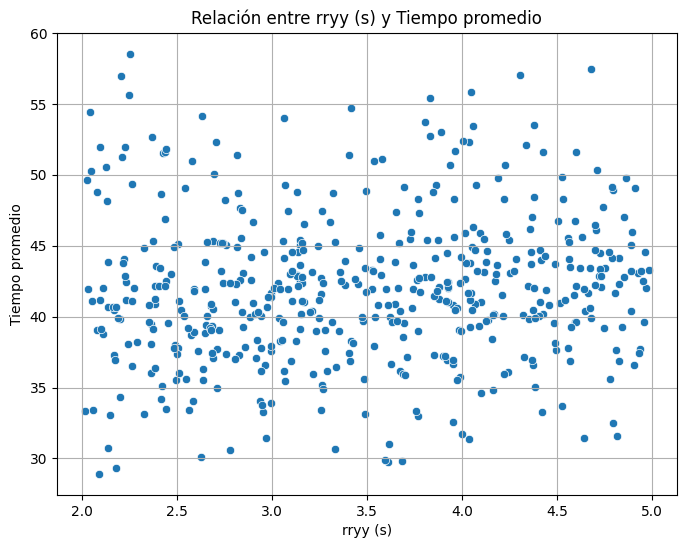

In [39]:

# Asumiendo que 'tiempo promedio' es tu variable dependiente y las demás son indepe

for var in variables_independientes:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data[variable_dependiente])
    plt.title(f'Relación entre {var} y {variable_dependiente}')
    plt.xlabel(var)
    plt.ylabel(variable_dependiente)
    plt.grid(True)
    plt.show()

In [12]:
from sklearn.tree import DecisionTreeRegressor as DTR

min_samples_leaf_val = [1,2,5,10]
for i in min_samples_leaf_val:
    dtr = DTR(min_samples_leaf=i)
    dtr.fit(X_train, y_train)
    y_pred2 = dtr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred2)
    r2 = r2_score(y_test, y_pred2)
    print(f'Error Cuadrático Medio (MSE): {mse:.2f} y con min_samples_leaf = {i}')
    print(f'Coeficiente de Determinación (R^2):  {r2: .2f} y con min_samples_leaf = {i}')
    
    


Error Cuadrático Medio (MSE): 2.44 y con min_samples_leaf = 1
Coeficiente de Determinación (R^2):   0.89 y con min_samples_leaf = 1
Error Cuadrático Medio (MSE): 2.99 y con min_samples_leaf = 2
Coeficiente de Determinación (R^2):   0.86 y con min_samples_leaf = 2
Error Cuadrático Medio (MSE): 4.05 y con min_samples_leaf = 5
Coeficiente de Determinación (R^2):   0.82 y con min_samples_leaf = 5
Error Cuadrático Medio (MSE): 3.33 y con min_samples_leaf = 10
Coeficiente de Determinación (R^2):   0.85 y con min_samples_leaf = 10


In [16]:
dtr = DTR(min_samples_leaf=1)
dtr.fit(X_train, y_train)
y_pred2 = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f'Error Cuadrático Medio (MSE): {mse:.2f} y con min_samples_leaf = 1')
print(f'Coeficiente de Determinación (R^2):  {r2: .2f} y con min_samples_leaf = {1}')

Error Cuadrático Medio (MSE): 2.36 y con min_samples_leaf = 1
Coeficiente de Determinación (R^2):   0.89 y con min_samples_leaf = 1


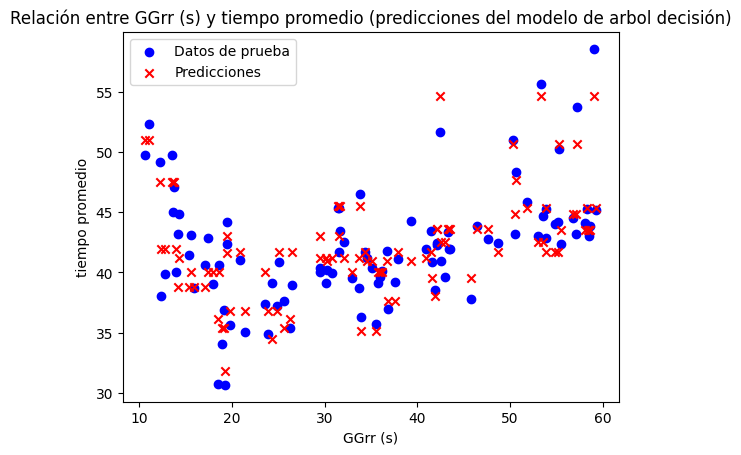

In [55]:
plt.scatter(X_test['GGrr (s)'], y_test, color='blue', label='Datos de prueba')
plt.scatter(X_test['GGrr (s)'], y_pred2, color='red', marker='x', label='Predicciones')
plt.xlabel('GGrr (s)')
plt.ylabel('tiempo promedio')
plt.title('Relación entre GGrr (s) y tiempo promedio (predicciones del modelo de arbol decisión)')
plt.legend()
plt.show()

[Text(0.26433768740968205, 0.9722222222222222, 'rrGG (s) <= 18.215\nsquared_error = 28.767\nsamples = 400\nvalue = 41.898'),
 Text(0.07445809248554913, 0.9166666666666666, 'GGrr (s) <= 25.683\nsquared_error = 26.703\nsamples = 65\nvalue = 48.051'),
 Text(0.1693978899476156, 0.9444444444444444, 'True  '),
 Text(0.03641618497109827, 0.8611111111111112, 'rrGG (s) <= 17.042\nsquared_error = 12.191\nsamples = 17\nvalue = 41.624'),
 Text(0.028901734104046242, 0.8055555555555556, 'GGrr (s) <= 20.805\nsquared_error = 3.603\nsamples = 15\nvalue = 42.49'),
 Text(0.020809248554913295, 0.75, 'rrGG (s) <= 12.911\nsquared_error = 1.067\nsamples = 11\nvalue = 41.916'),
 Text(0.011560693641618497, 0.6944444444444444, 'GGrr (s) <= 13.518\nsquared_error = 0.674\nsamples = 7\nvalue = 42.507'),
 Text(0.004624277456647399, 0.6388888888888888, 'rrGG (s) <= 10.448\nsquared_error = 0.057\nsamples = 3\nvalue = 41.737'),
 Text(0.0023121387283236996, 0.5833333333333334, 'squared_error = 0.0\nsamples = 1\nvalue =

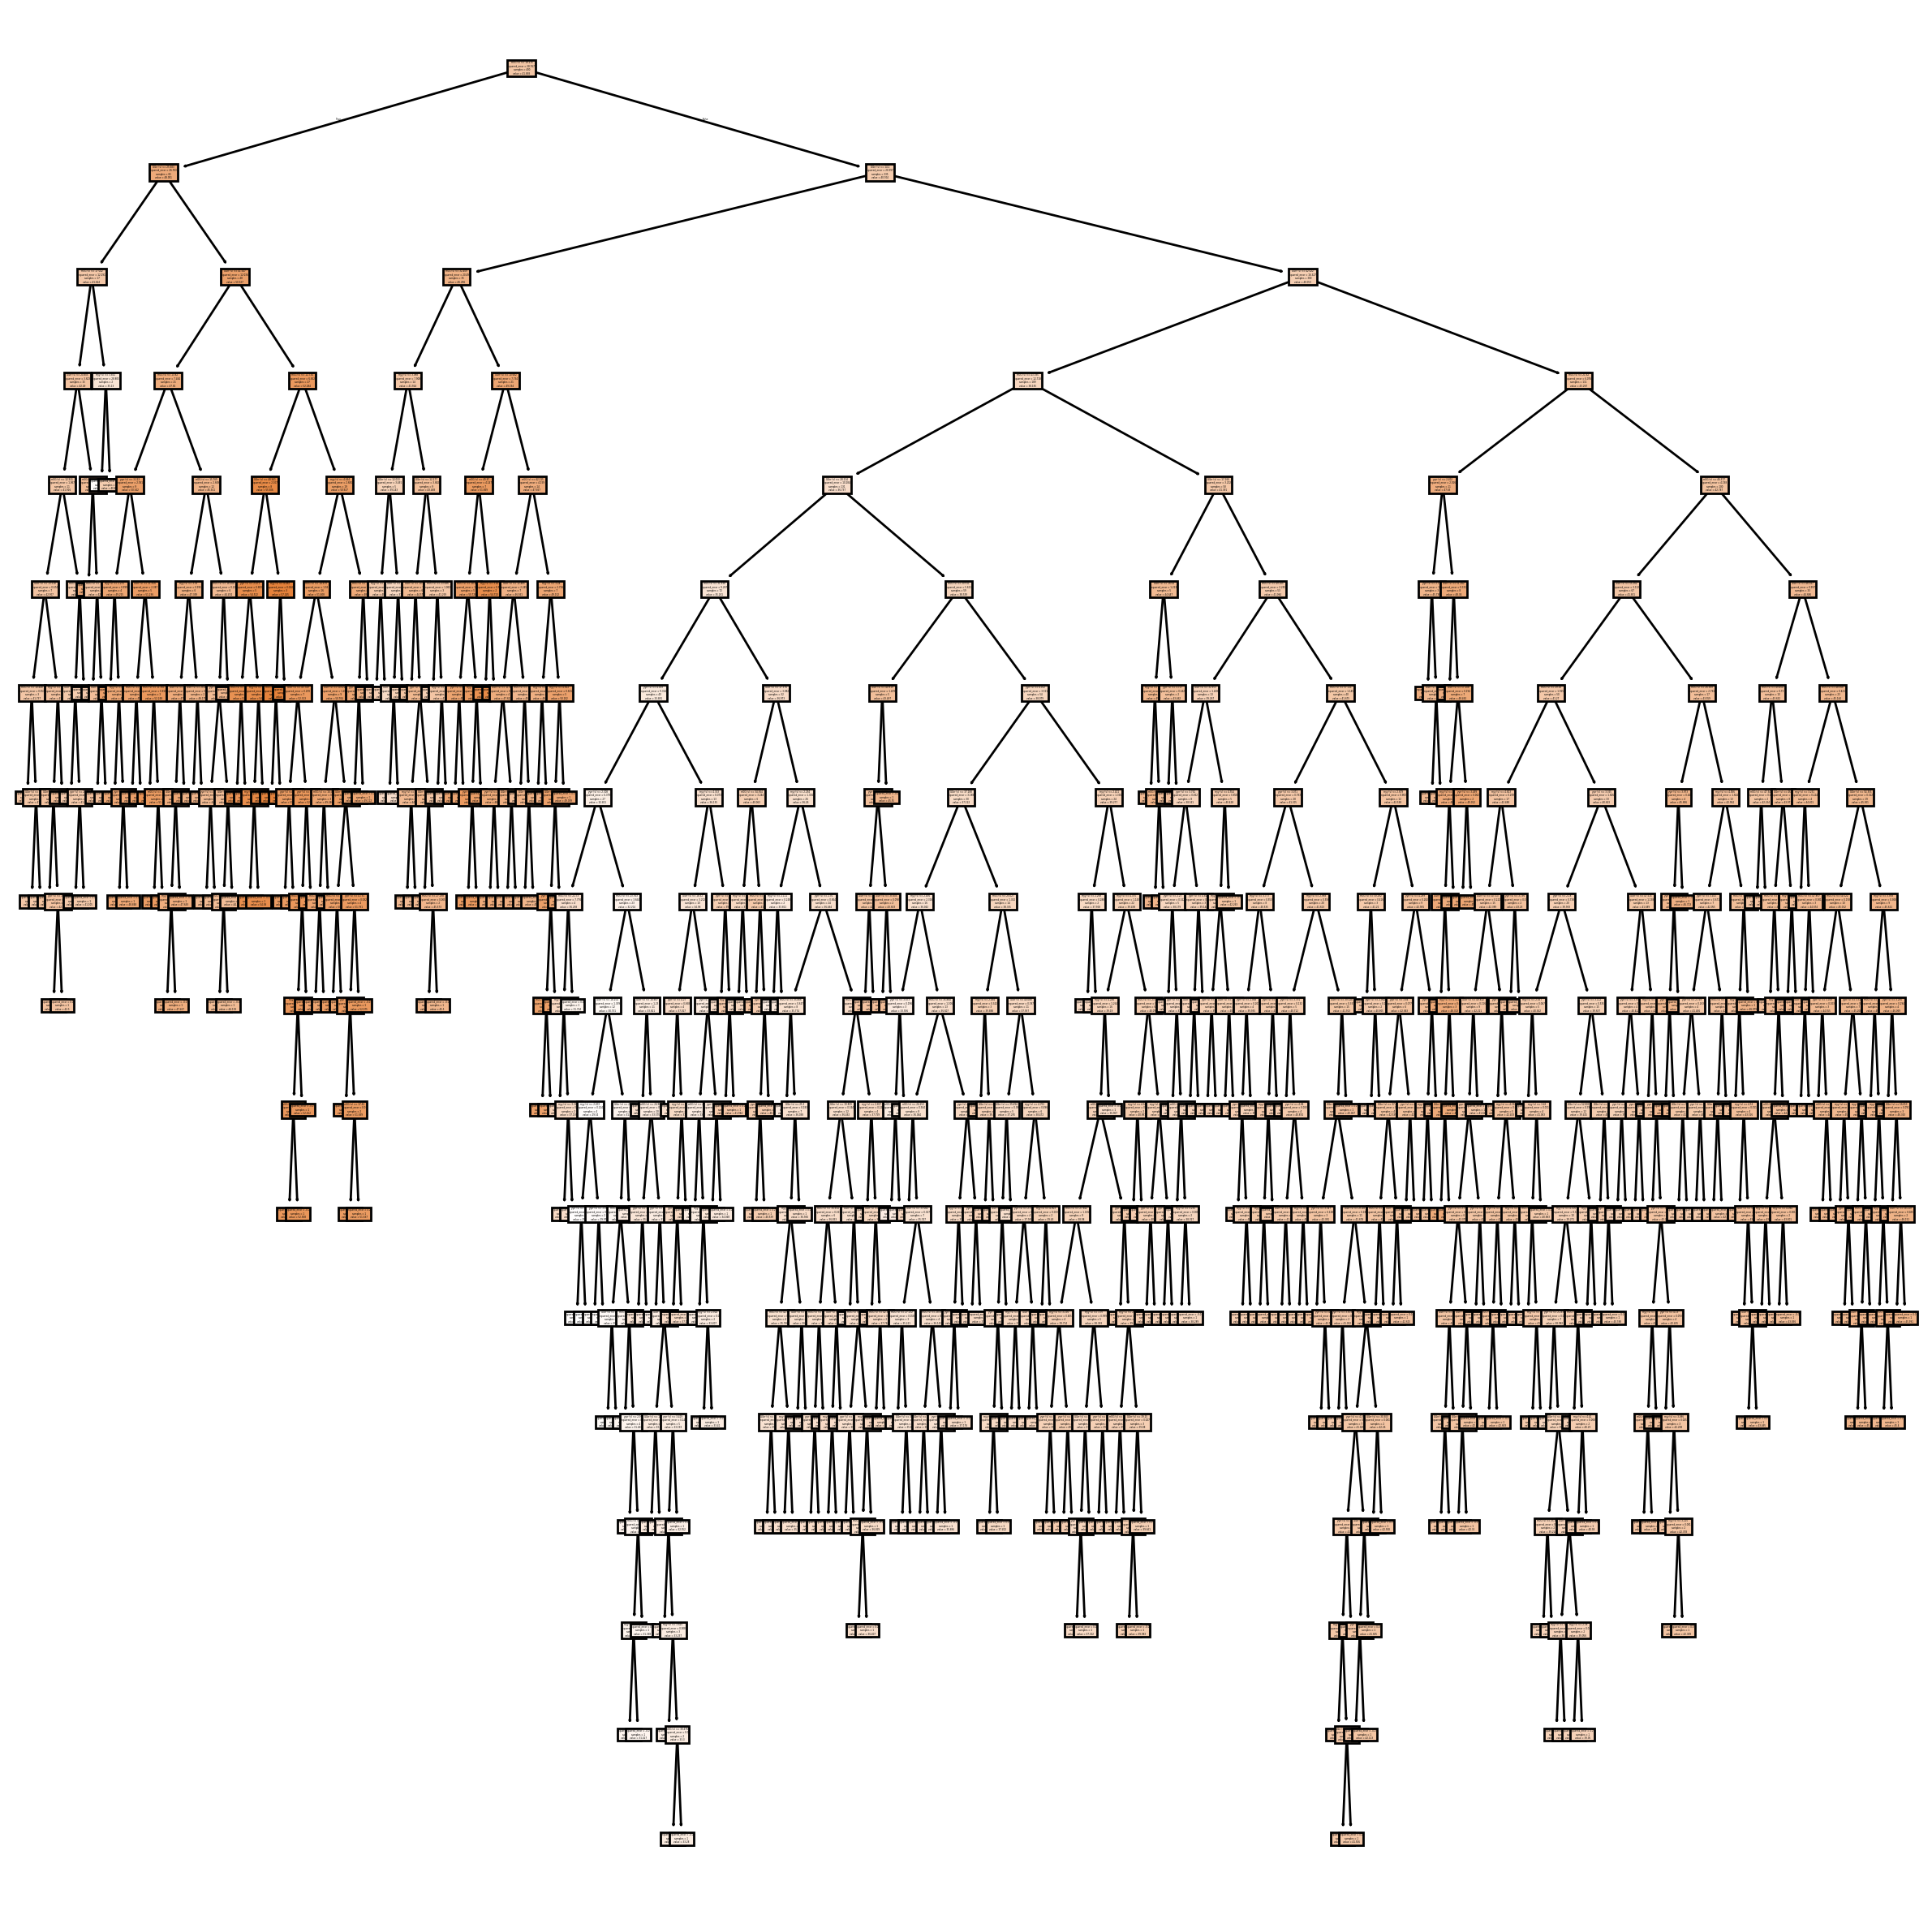

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15), dpi=200)
plot_tree(dtr, feature_names=list(data.columns[2:6]), filled=True)

In [30]:
dtr = DTR(min_samples_leaf=10)
dtr.fit(X_train, y_train)
y_pred2 = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f'Error Cuadrático Medio (MSE): {mse:.2f} y con min_samples_leaf = 1')
print(f'Coeficiente de Determinación (R^2):  {r2: .2f} y con min_samples_leaf = {1}')

Error Cuadrático Medio (MSE): 3.33 y con min_samples_leaf = 1
Coeficiente de Determinación (R^2):   0.85 y con min_samples_leaf = 1


[Text(0.2714285714285714, 0.95, 'rrGG (s) <= 18.215\nsquared_error = 28.767\nsamples = 400\nvalue = 41.898'),
 Text(0.08571428571428572, 0.85, 'GGrr (s) <= 25.683\nsquared_error = 26.703\nsamples = 65\nvalue = 48.051'),
 Text(0.17857142857142855, 0.8999999999999999, 'True  '),
 Text(0.05714285714285714, 0.75, 'squared_error = 12.191\nsamples = 17\nvalue = 41.624'),
 Text(0.11428571428571428, 0.75, 'GGrr (s) <= 41.547\nsquared_error = 12.036\nsamples = 48\nvalue = 50.327'),
 Text(0.05714285714285714, 0.65, 'rrGG (s) <= 14.347\nsquared_error = 7.444\nsamples = 21\nvalue = 47.81'),
 Text(0.02857142857142857, 0.55, 'squared_error = 3.432\nsamples = 11\nvalue = 49.87'),
 Text(0.08571428571428572, 0.55, 'squared_error = 2.052\nsamples = 10\nvalue = 45.544'),
 Text(0.17142857142857143, 0.65, 'rrGG (s) <= 13.581\nsquared_error = 6.852\nsamples = 27\nvalue = 52.284'),
 Text(0.14285714285714285, 0.55, 'squared_error = 3.406\nsamples = 11\nvalue = 54.674'),
 Text(0.2, 0.55, 'squared_error = 2.595

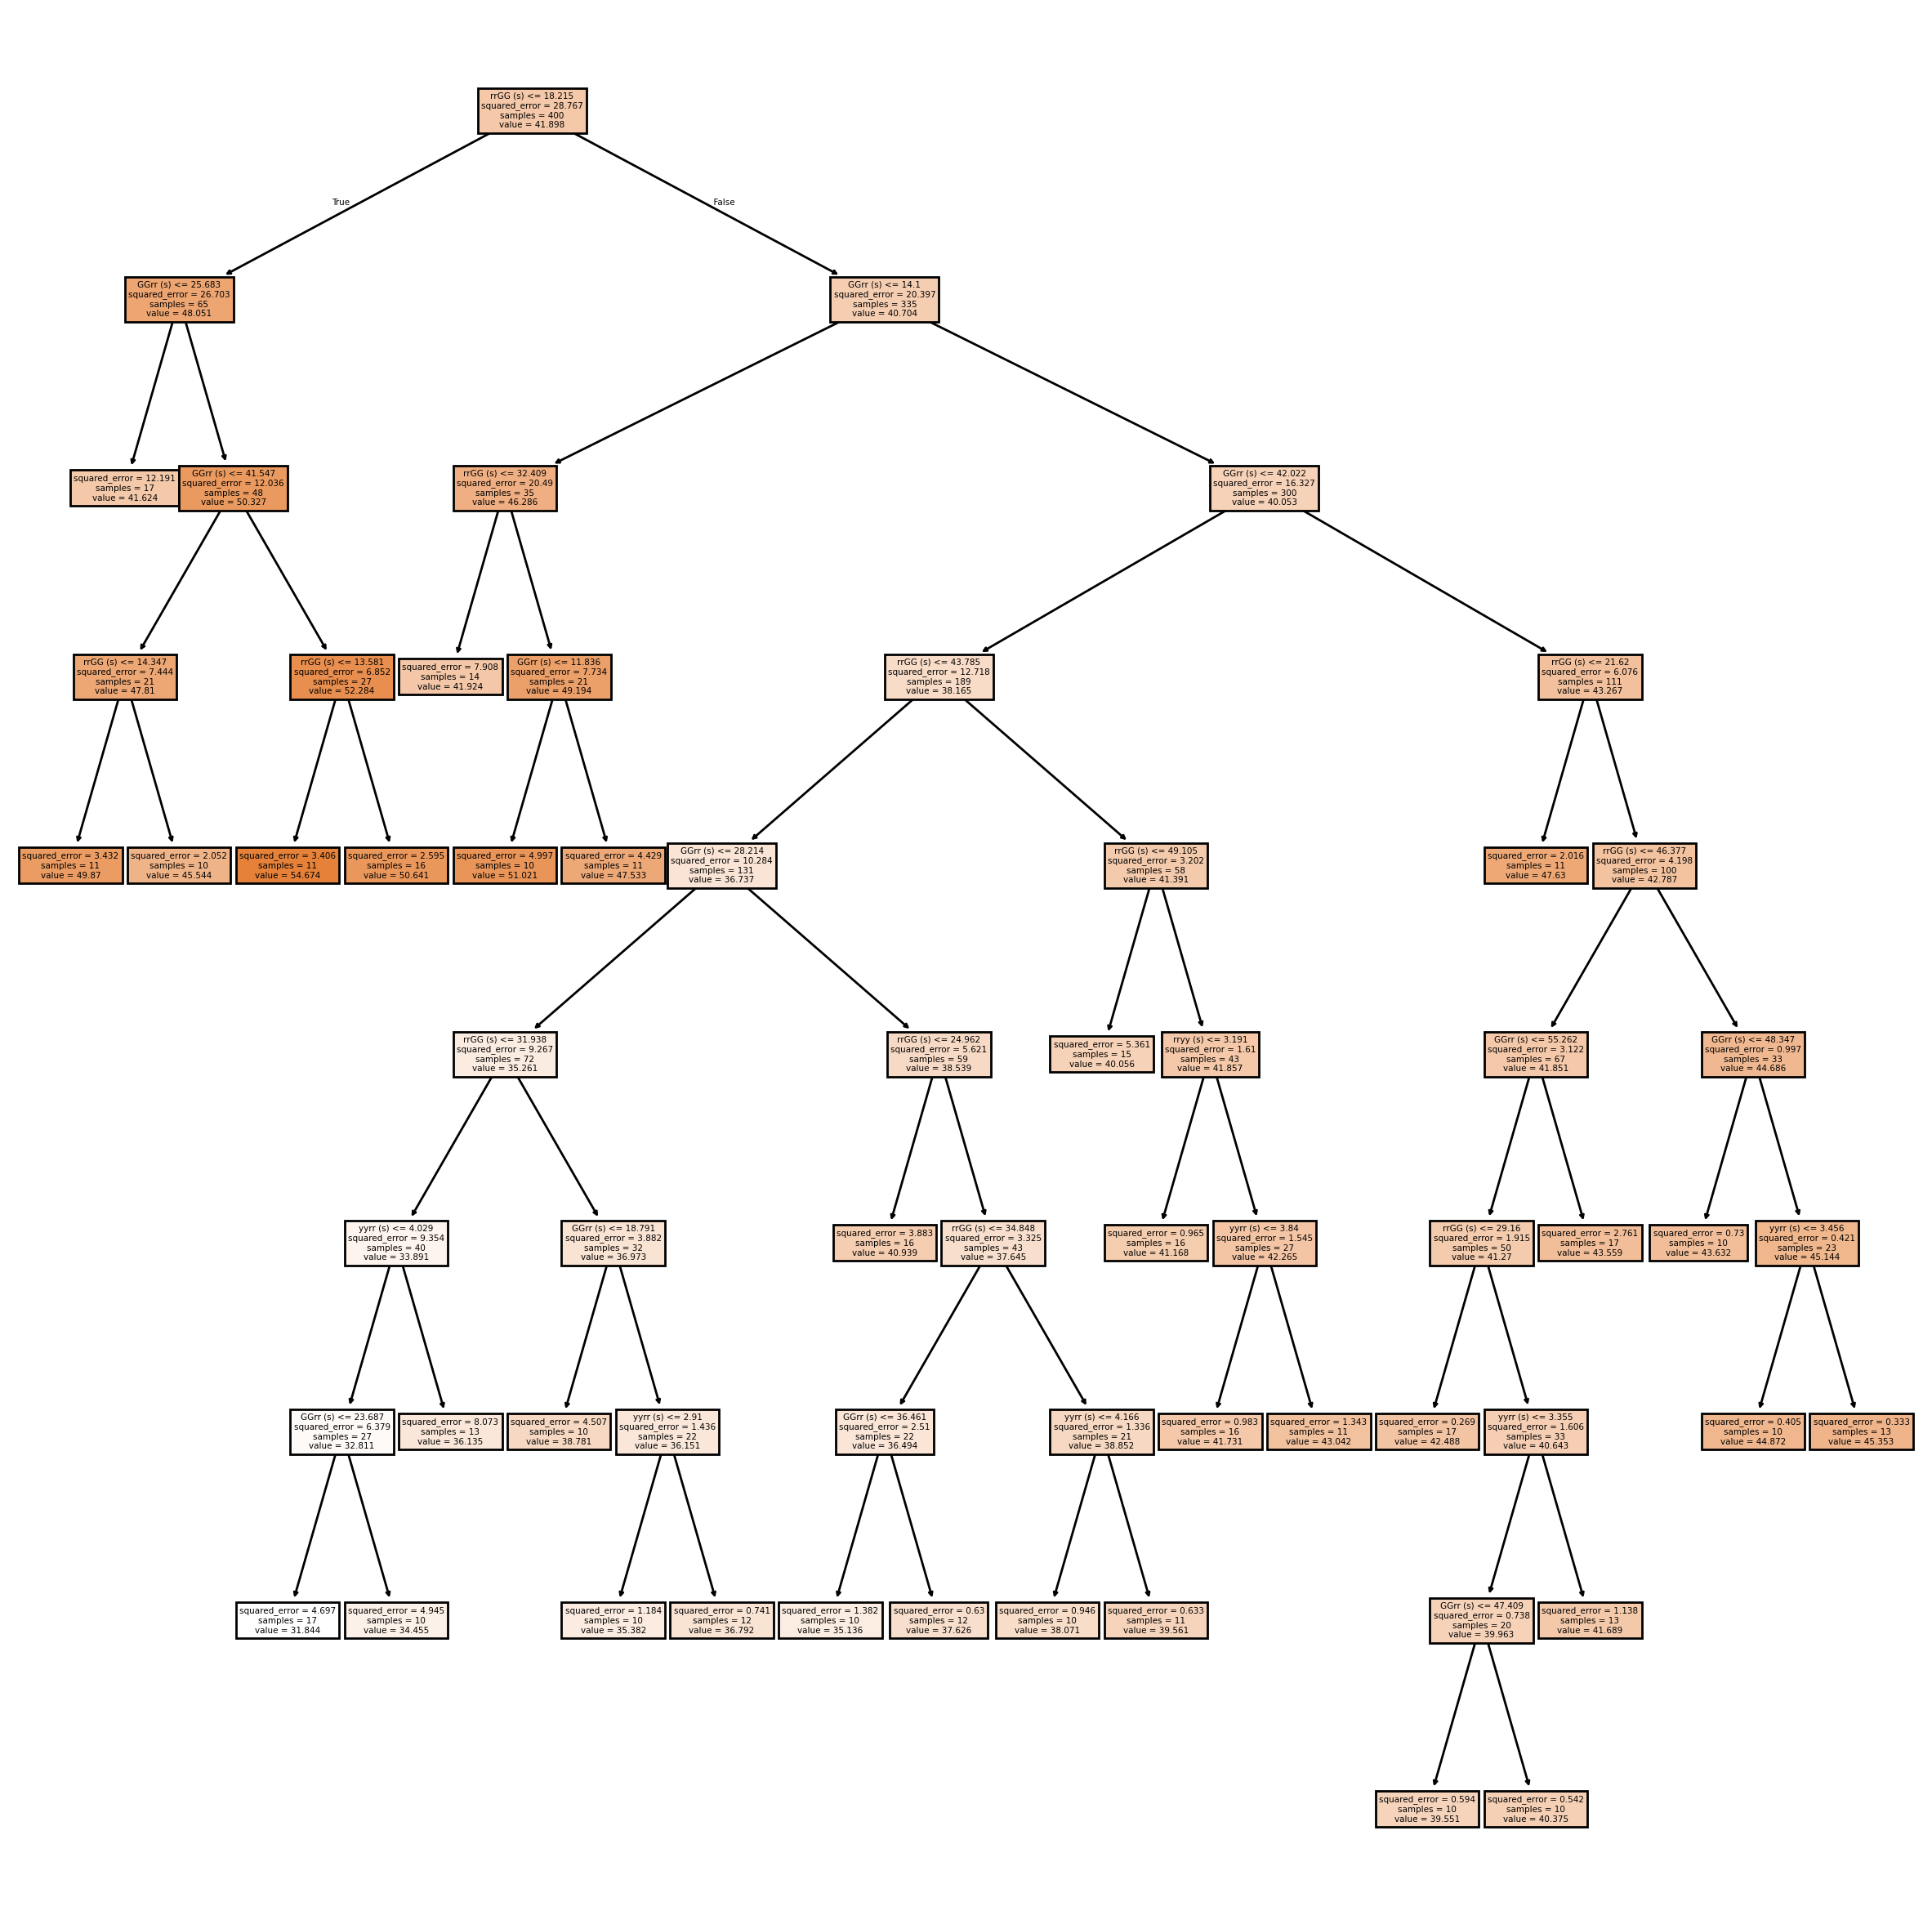

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15), dpi=200)
plot_tree(dtr, feature_names=list(data.columns[2:6]), filled=True)

In [48]:
from scipy.optimize import minimize
def funcion_objetivo(fases):
    return dtr.predict([fases])[0]

In [49]:
bounds = [(10,60), (2,5), (10,60), (2,5)]

In [50]:
valor_inicial = X.mean().values

In [51]:
resultado = minimize(funcion_objetivo, valor_inicial, bounds=bounds)

c:\Users\emman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\emman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\emman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\emman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\emman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\util

In [52]:
fases_optimas = resultado.x

In [53]:
tiempo_estimado = resultado.fun

In [54]:
print("Fases óptimas:", fases_optimas)
print("Tiempo promedio estimado:", tiempo_estimado)

Fases óptimas: [34.5254704   3.50377172 34.70960145  3.47412848]
Tiempo promedio estimado: 35.13550127168536
